# PRJEB48206 - Izquierdo-Lara et al.

Article link: [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9927792/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9927792/).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [2]:
coco <- read.csv(here("data/processed/PRJEB48206_processed.csv.gz"))
coco$mutation <- parse_mutations(coco$label)
head(coco)


In [3]:
lineages_in_paper <- c("B.1.621", "P.1", "B.1.617.2", "B.1.351", "B.1.1.7", "B.1.221", "B.177", "B.1.160")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


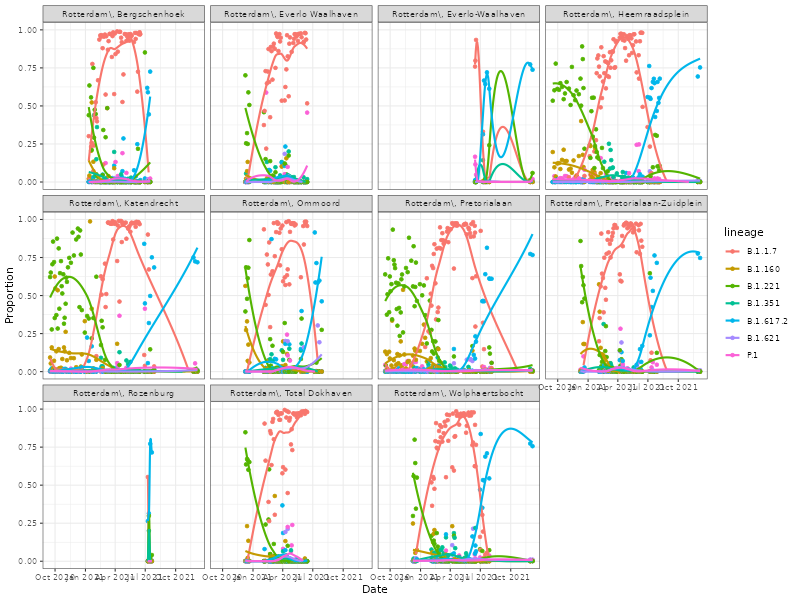

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

# One date failed to parse and looks like it's from 1900s (but no estimate)
res <- res[res$date > ymd("2020-01-01"), ]

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
